In [1]:
# importing required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1).csv


In [4]:
salary = pd.read_csv('SalaryData_Train(1).csv')

In [5]:
salary_test = pd.read_csv('SalaryData_Test(1).csv')

In [6]:
salary.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [9]:
salary.shape

(30161, 14)

In [10]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [11]:
salary.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [12]:
np.unique(salary['Salary'])

array([' <=50K', ' >50K'], dtype=object)

In [13]:
np.unique(salary['maritalstatus'])

array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], dtype=object)

We can see that the dataset does not have proper column names. The column names should contain underscore instead of "hyphen-minus". We should give proper names to the columns.

In [14]:
col_names = ['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'Salary']

salary.columns = col_names
salary_test.columns = col_names


In [15]:
salary.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'Salary'],
      dtype='object')

In [16]:
salary_test.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'Salary'],
      dtype='object')

In [17]:
#checking for null values
salary.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
Salary            0
dtype: int64

In [18]:
#checking for null values
salary_test.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
Salary            0
dtype: int64

## DATA PREPROCESSING

### Finding categorical values and numerical values

In [19]:
categorical = [var for var in salary.columns if salary[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'Salary']


In [20]:
numerical = [var_1 for var_1 in salary.columns if salary[var_1].dtype=='int64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 5 numerical variables

The numerical variables are :

 ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [21]:
for var in categorical: 
    
    print(salary[var].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: marital_status, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Othe

## DATA VISUALIZATION

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

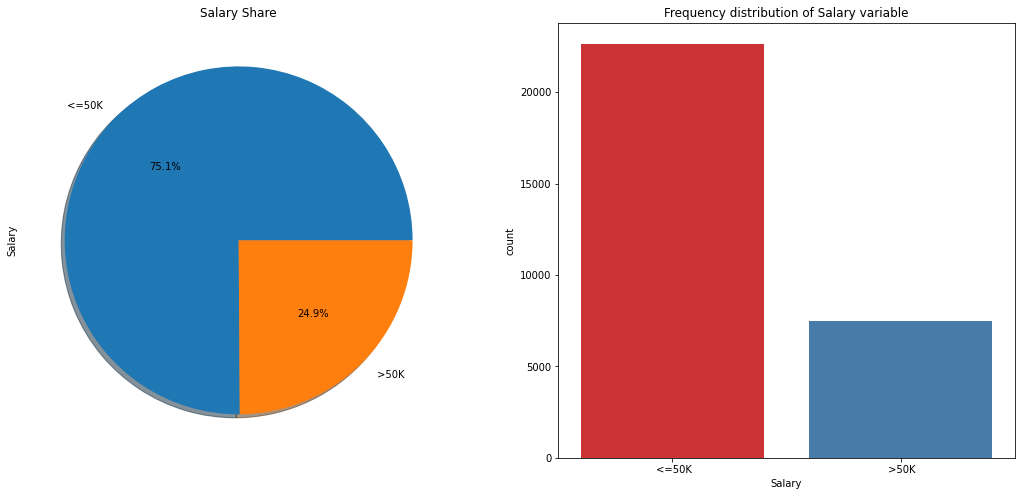

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = salary['Salary'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Salary Share')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Salary", data=salary, palette="Set1")
ax[1].set_title("Frequency distribution of Salary variable")

plt.show()

In [24]:
salary['Salary'].value_counts()/len(salary)


 <=50K    0.751069
 >50K     0.248931
Name: Salary, dtype: float64

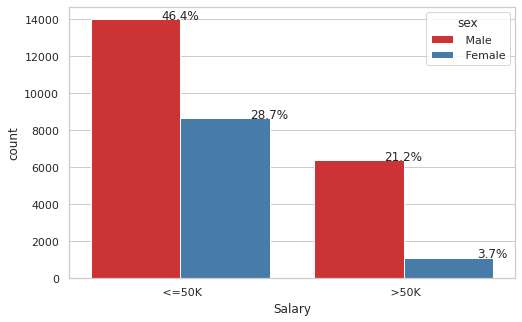

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(salary))
ax = sns.countplot(x="Salary", hue="sex", data=salary,palette='Set1')
#plt.title('No. of Smokers', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

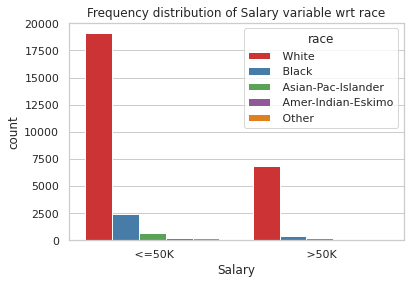

In [26]:
#f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="Salary", hue="race", data=salary, palette="Set1")
ax.set_title("Frequency distribution of Salary variable wrt race")
plt.show()

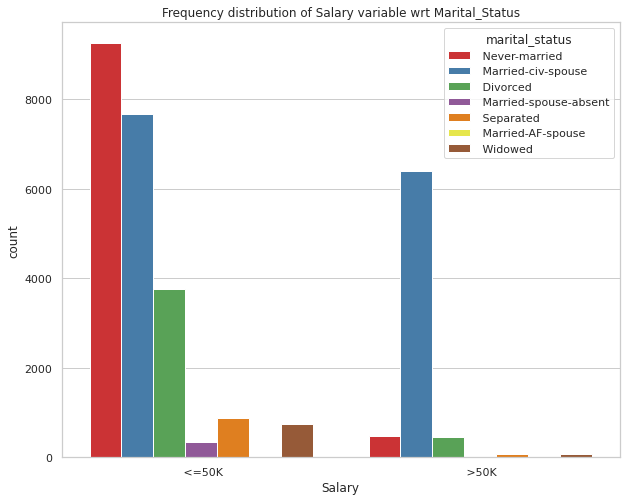

In [27]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="Salary", hue="marital_status", data=salary, palette="Set1")
ax.set_title("Frequency distribution of Salary variable wrt Marital_Status")
plt.show()

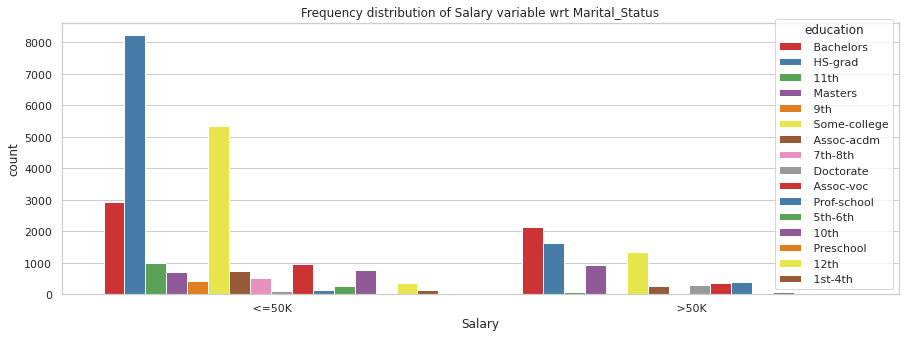

In [28]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(x="Salary", hue="education", data=salary, palette="Set1")
ax.set_title("Frequency distribution of Salary variable wrt Marital_Status")
plt.show()

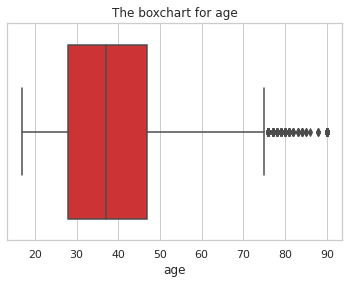

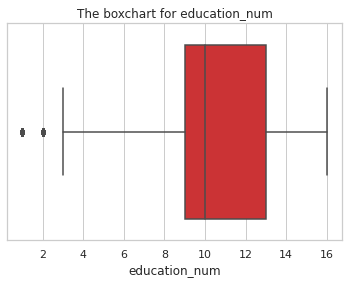

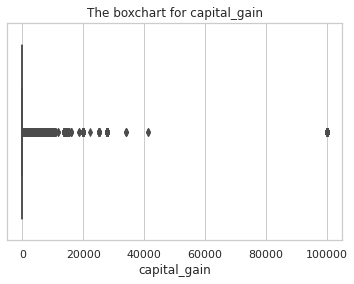

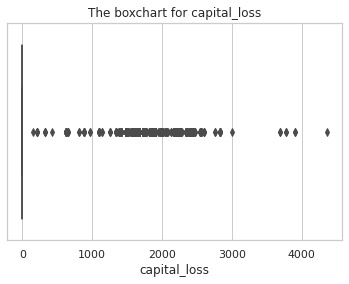

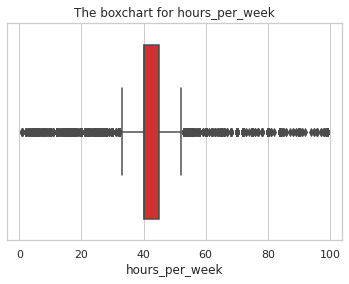

In [29]:
#Let's check for outliers in the numerical columns
for i in numerical:
    sns.boxplot(x = salary[i][1:],data=salary.iloc[1:], order=salary[i][1:].value_counts().index, palette='Set1')
    plt.title("The boxchart for {}".format(i))
    plt.show()

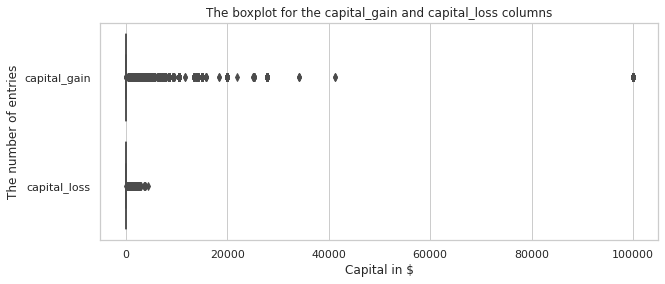

In [30]:
plt.figure(figsize=(10,4))
plt.title('The boxplot for the capital_gain and capital_loss columns')
sns.boxplot( data=salary[['capital_gain','capital_loss']], orient='h')
plt.ylabel('The number of entries')
plt.xlabel('Capital in $')
plt.show()

### Dropping these outliers as it can lead to the result distortion

In [31]:
abc = salary.loc[salary['capital_gain']>90000,'capital_gain'].index
salary.drop(index=abc,inplace=True)

In [32]:
temp_1 = salary.loc[salary['capital_loss']>4000,'capital_loss'].index
salary.drop(index=temp_1,inplace=True)

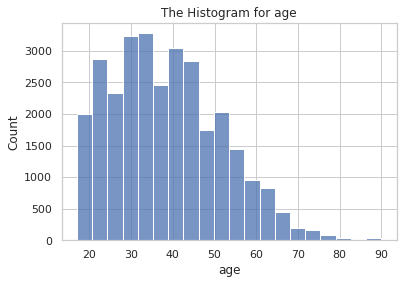

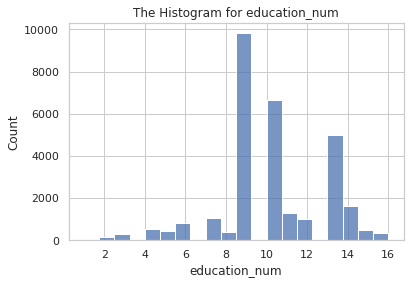

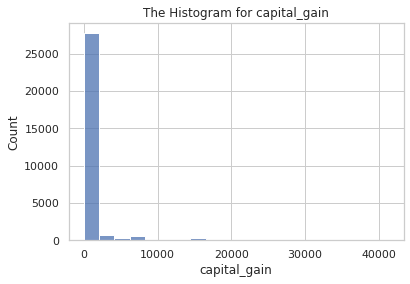

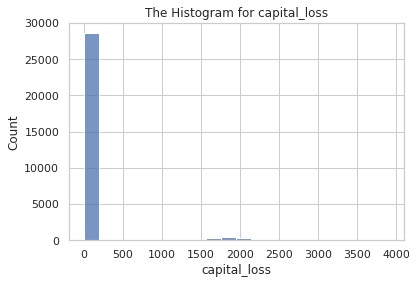

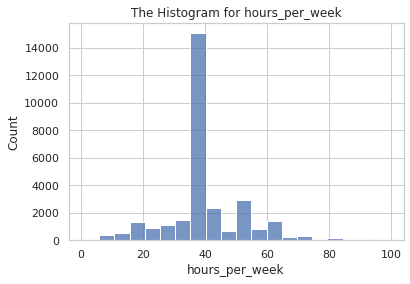

In [33]:
for i in numerical:
    sns.histplot(x=salary[i], palette='Set1',bins=20)
    plt.title("The Histogram for {}".format(i))
    plt.show()

Interpretation

Most of the people are between 20-50 age range. The graph is rightly skewed so we need to normalize it by scaling
The majority af hours per week no more than 50 h/w, and the most value is about 40 (8 hours per day).

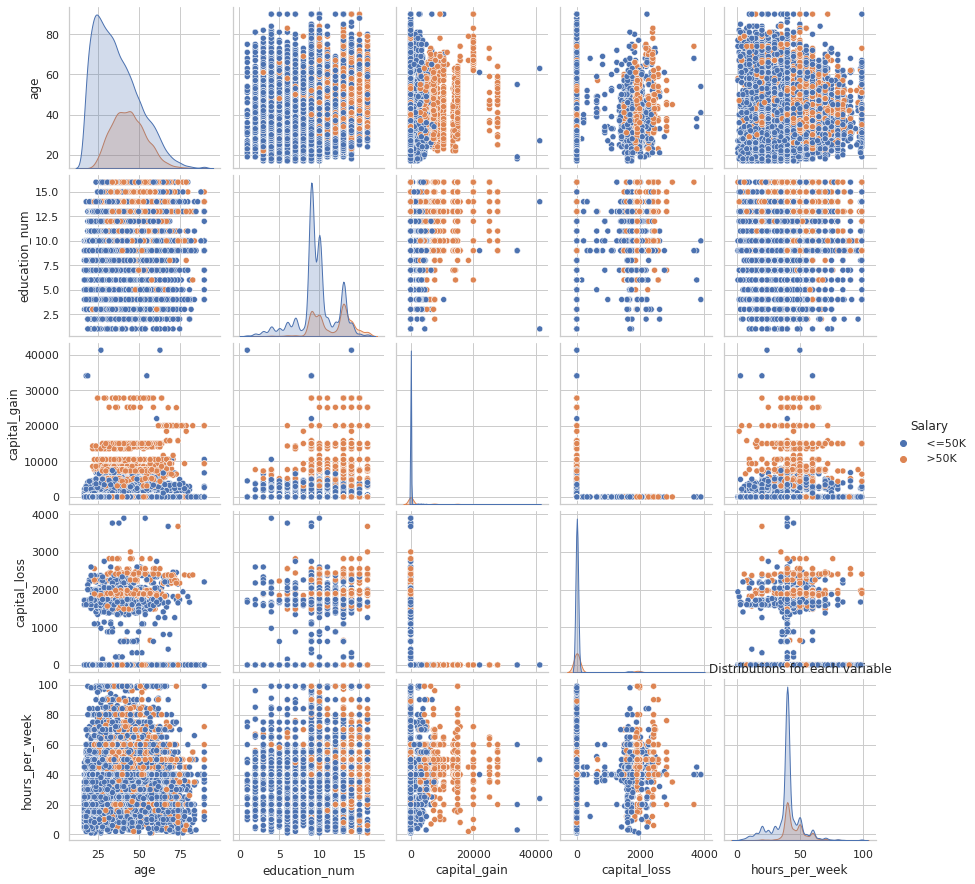

In [34]:
sns.pairplot(data=salary, hue="Salary")
plt.title('Distributions for each variable')
plt.show()

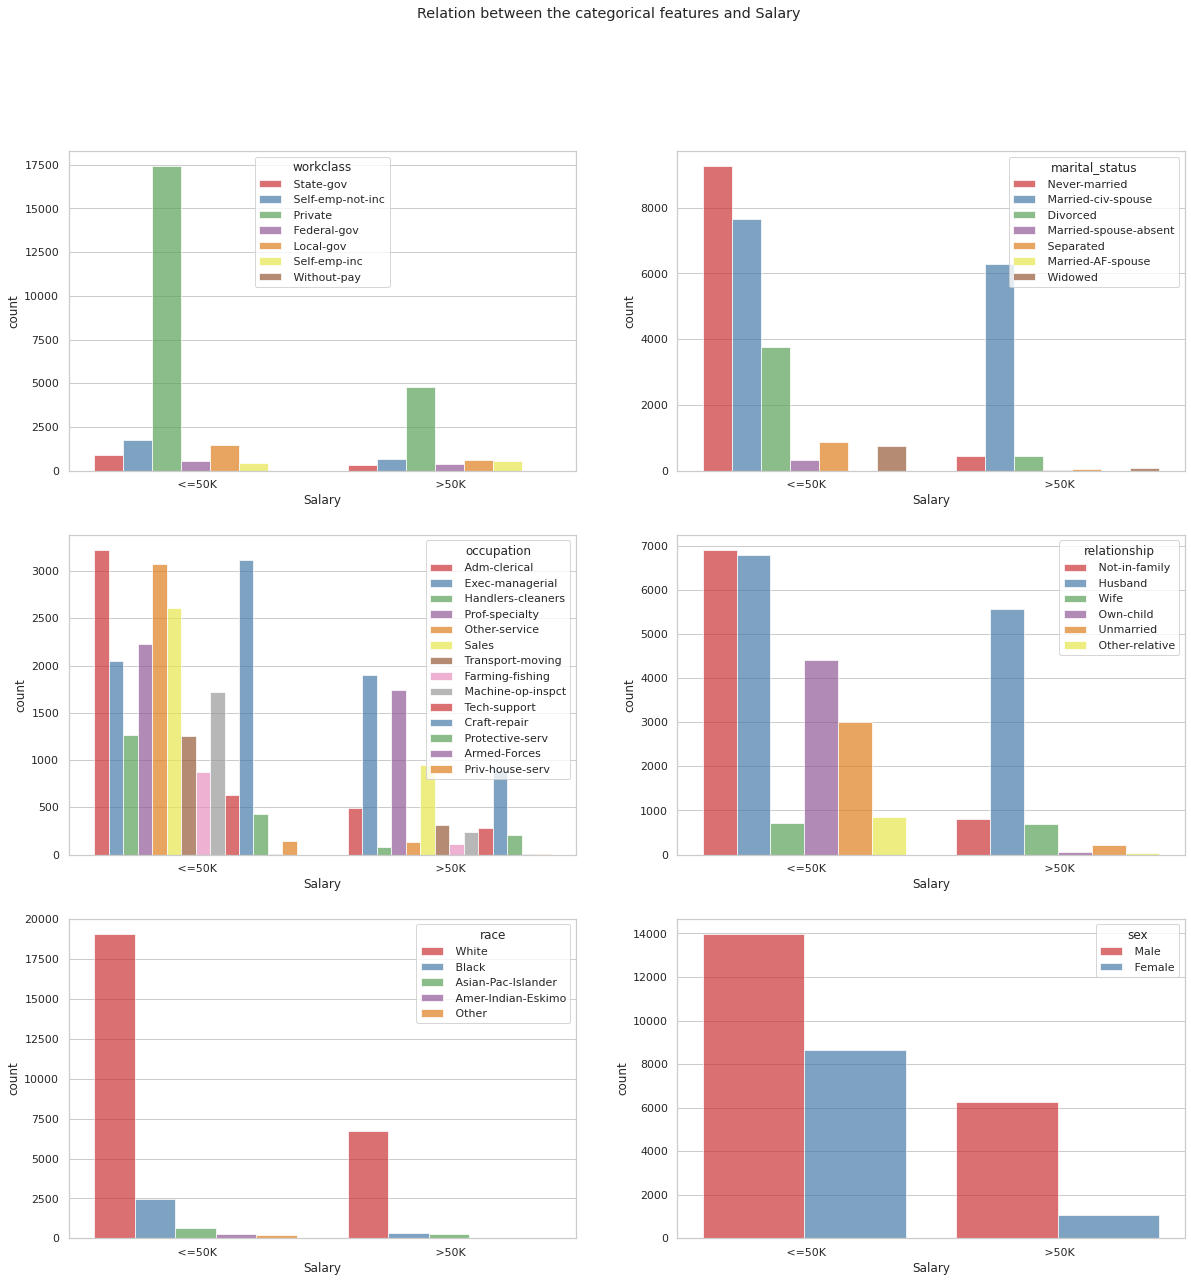

In [35]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
axs = axs.flatten()
fig.suptitle('Relation between the categorical features and Salary')

categorical2 = ['workclass', 'marital_status','occupation','relationship','race','sex',]
for ax, i in enumerate(categorical2):
    sns.countplot(x='Salary', alpha=0.7, hue=i, data=salary, ax=axs[ax],palette='Set1')

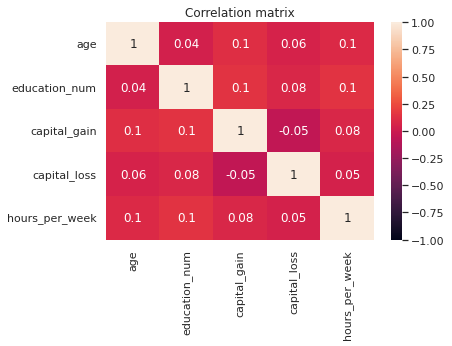

In [36]:
corr = salary.corr()
#matrix = np.triu(corr)
sns.heatmap(corr, vmax=1.0, vmin=-1.0, fmt='.1g', annot=True)

plt.title('Correlation matrix')
plt.show()

## Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le=LabelEncoder()

In [39]:
salary.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'Salary'],
      dtype='object')

In [40]:
#Converting the nonnumeric data to the numeric data
salary['workclass']= le.fit_transform(salary['workclass'])
salary['education']= le.fit_transform(salary['education'])
salary['marital_status']= le.fit_transform(salary['marital_status'])
salary['occupation']= le.fit_transform(salary['occupation'])
salary['relationship']= le.fit_transform(salary['relationship'])
salary['race']= le.fit_transform(salary['race'])
salary['sex']= le.fit_transform(salary['sex'])
salary['native_country']= le.fit_transform(salary['native_country'])
salary['Salary']= le.fit_transform(salary['Salary'])

In [41]:
salary_test['workclass']= le.fit_transform(salary_test['workclass'])
salary_test['education']= le.fit_transform(salary_test['education'])
salary_test['marital_status']= le.fit_transform(salary_test['marital_status'])
salary_test['occupation']= le.fit_transform(salary_test['occupation'])
salary_test['relationship']= le.fit_transform(salary_test['relationship'])
salary_test['race']= le.fit_transform(salary_test['race'])
salary_test['sex']= le.fit_transform(salary_test['sex'])
salary_test['native_country']= le.fit_transform(salary_test['native_country'])
salary_test['Salary']= le.fit_transform(salary_test['Salary'])

In [42]:
salary.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [43]:
salary = salary.iloc[:,[13,0,1,2,3,5,6,7,8,9,10,11,12]]
salary_test = salary_test.iloc[:,[13,0,1,2,3,5,6,7,8,9,10,11,12]]

In [44]:
train_X = salary.iloc[:, 1:]
train_y = salary.iloc[:, 0]
test_X  = salary_test.iloc[:, 1:]
test_y  = salary_test.iloc[:, 0]

## Scaling the variables

In [45]:
from sklearn.preprocessing import scale
trainX= scale(train_X)
testX=scale(test_X)

In [46]:
trainX

array([[ 0.04580263,  2.93816431, -0.3478783 , ..., -0.21912283,
        -0.07408974,  0.2665608 ],
       [ 0.88343367,  1.889798  , -0.3478783 , ..., -0.21912283,
        -2.33178739,  0.2665608 ],
       [-0.03034564, -0.20693463,  0.1761786 , ..., -0.21912283,
        -0.07408974,  0.2665608 ],
       ...,
       [ 1.49261988, -0.20693463,  0.1761786 , ..., -0.21912283,
        -0.07408974,  0.2665608 ],
       [-1.24871805, -0.20693463,  0.1761786 , ..., -0.21912283,
        -1.74645837,  0.2665608 ],
       [ 1.03573022,  0.84143168,  0.1761786 , ..., -0.21912283,
        -0.07408974,  0.2665608 ]])

## Model Building

# SUPPORT VECTOR MACHINE

In [47]:
# kernel = linear
model_rbf = SVC(kernel = "linear")
model_rbf.fit(trainX,train_y)
pred_test_linear = model_rbf.predict(testX)

In [48]:
np.mean(pred_test_linear==test_y)

0.797476759628154

In [49]:
# kernel = poly
model_poly = SVC(kernel = "poly")
model_poly.fit(trainX,train_y)
pred_test_poly = model_poly.predict(testX)

In [50]:
np.mean(pred_test_poly==test_y)

0.8247675962815405

In [51]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(trainX,train_y)
pred_test_rbf = model_rbf.predict(testX)

In [52]:
np.mean(pred_test_rbf==test_y)

0.8268260292164674

In [53]:
# kernel = sigmoid
model_rbf = SVC(kernel = "sigmoid")
model_rbf.fit(trainX,train_y)
pred_test_sigmoid = model_rbf.predict(testX)

In [54]:
np.mean(pred_test_sigmoid==test_y)

0.7181274900398407

## ACCURACY IS BEST WHEN WE USE RBF KERNAL TRICK